In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Biden.csv')
df

,user_country,source,content,date
0,USA,Twitter Web App,Frank Luntz isn’t sure what the bombshell is i...,2020-10-22T23:59:59+00:00
1,Portland,Twitter Web App,"I am also hoping for at least one more ""shut u...",2020-10-22T23:59:59+00:00
2,"Minnesota, USA",Twitter for iPhone,Bombshell: Biden Insider Claims He Was 'Recipi...,2020-10-22T23:59:59+00:00
3,NaN,Twitter Web App,"@michaeldweiss Sure, spend more time tweeting ...",2020-10-22T23:59:59+00:00
4,"Florida, USA",Twitter for iPhone,So verified e-mails that were just corroborate...,2020-10-22T23:59:59+00:00
...,...,...,...,...
1995,United States,Twitter for iPhone,The Biden’s are dirty. We only know a very ve...,2020-10-22T23:56:50+00:00
1996,NaN,Twitter Web App,Trump invites Hunter Biden ex-associate Tony B...,2020-10-22T23:56:50+00:00
1997,NaN,Twitter for Android,I heard Biden just invited Giuliani and Borat ...,2020-10-22T23:56:50+00:00
1998,Minnesota,Twitter for iPhone,It’s going to be another shit show tonight! I ...,2020-10-22T23:56:50+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

55259
['frank', 'luntz', 'isn', '’', 't', 'sure', 'what', 'the', 'bombshell', 'is', 'in', 'this', 'email', 'from', 'hunter', 'biden', 'he', 'doesn', '’', 't']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 154.92%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

24638
['frank', 'luntz', 'sure', 'bombshell', 'email', 'hunter', 'biden', 'deny', 'receiving', 'via', 'also', 'hoping', 'least', 'one', 'shut', 'something', 'similar', 'moderator', 'kristen', 'welker']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 112),
 ('@joebiden', 90),
 ('@youtube', 55),
 ('@donaldjtrumpjr', 27),
 ('@foxnews', 27),
 ('@gatewaypundit', 17),
 ('@johnrobertsfox', 16),
 ('@gop', 15),
 ('@richlowry', 13),
 ('@nbcnews', 13),
 ('@breitbartnews', 12),
 ('@nypost', 11),
 ('@teamtrump', 11),
 ('@potus', 11),
 ('@cenkuygur', 11),
 ('@cnn', 11),
 ('@kimstrassel', 11),
 ('@charliekirk11', 10),
 ('@abc', 8),
 ('@berniesanders', 7)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,USA,Twitter Web App,Frank Luntz isn’t sure what the bombshell is i...,2020-10-22T23:59:59+00:00,Positive
1,Portland,Twitter Web App,"I am also hoping for at least one more ""shut u...",2020-10-22T23:59:59+00:00,Negative
2,"Minnesota, USA",Twitter for iPhone,Bombshell: Biden Insider Claims He Was 'Recipi...,2020-10-22T23:59:59+00:00,Positive
3,NaN,Twitter Web App,"@michaeldweiss Sure, spend more time tweeting ...",2020-10-22T23:59:59+00:00,Positive
4,"Florida, USA",Twitter for iPhone,So verified e-mails that were just corroborate...,2020-10-22T23:59:59+00:00,Negative
...,...,...,...,...,...
1995,United States,Twitter for iPhone,The Biden’s are dirty. We only know a very ve...,2020-10-22T23:56:50+00:00,Negative
1996,NaN,Twitter Web App,Trump invites Hunter Biden ex-associate Tony B...,2020-10-22T23:56:50+00:00,Neutral
1997,NaN,Twitter for Android,I heard Biden just invited Giuliani and Borat ...,2020-10-22T23:56:50+00:00,Neutral
1998,Minnesota,Twitter for iPhone,It’s going to be another shit show tonight! I ...,2020-10-22T23:56:50+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Neutral     769
Positive    710
Negative    521
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 35.50%
Percentage of neutral tweets: 38.45%
Percentage of negative tweets: 26.05%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

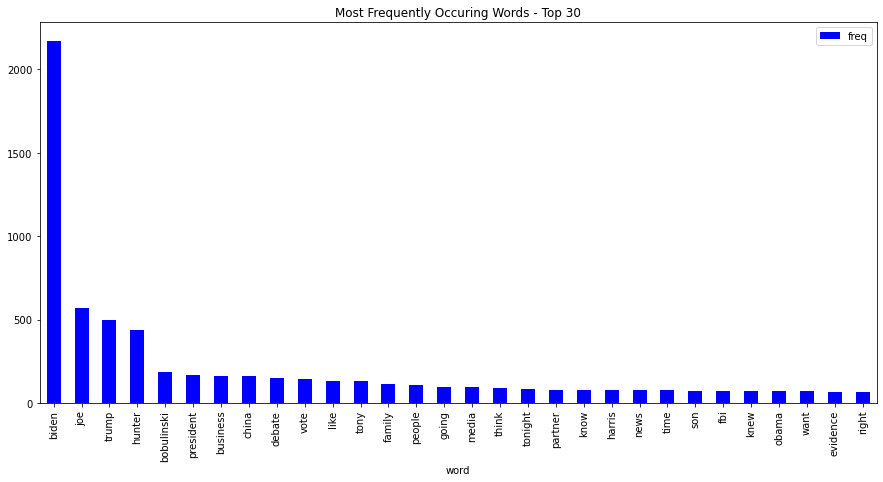

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Biden-Debate1')

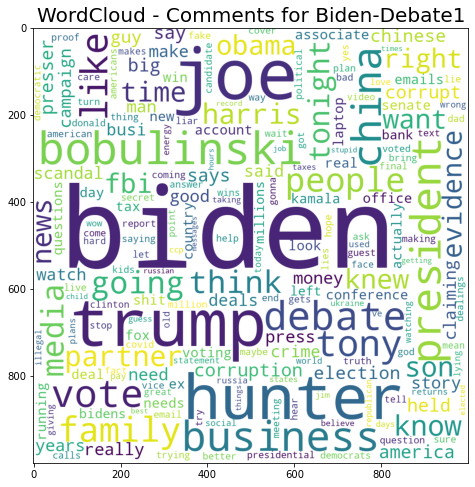

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Biden-Debate1", fontsize = 20)

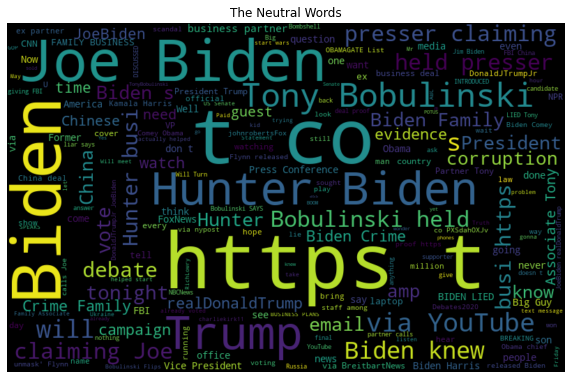

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

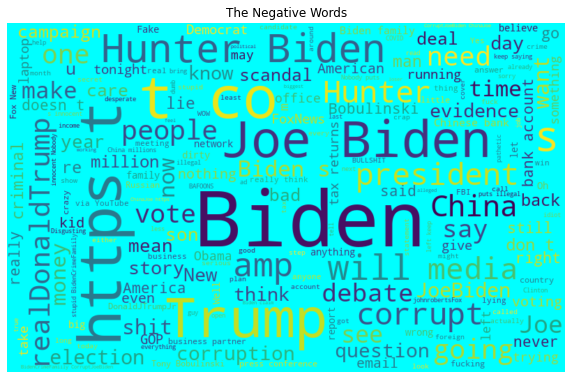

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

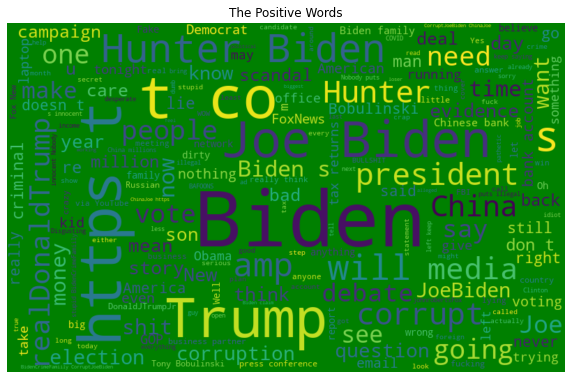

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,Frank Luntz isn’t sure what the bombshell is i...,Positive
1,"I am also hoping for at least one more ""shut u...",Negative
2,Bombshell: Biden Insider Claims He Was 'Recipi...,Positive
3,"@michaeldweiss Sure, spend more time tweeting ...",Positive
4,So verified e-mails that were just corroborate...,Negative
...,...,...
1995,The Biden’s are dirty. We only know a very ve...,Negative
1996,Trump invites Hunter Biden ex-associate Tony B...,Neutral
1997,I heard Biden just invited Giuliani and Borat ...,Neutral
1998,It’s going to be another shit show tonight! I ...,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,frank luntz isn t sure what the bombshell is i...
1,Negative,i am also hoping for at least one more shut up...
2,Positive,bombshell biden insider claims he was recipien...
3,Positive,sure spend more time tweeting about hunter bid...
4,Negative,so verified e mails that were just corroborate...
...,...,...
1995,Negative,the biden s are dirty we only know a very very...
1996,Neutral,trump invites hunter biden ex associate tony b...
1997,Neutral,i heard biden just invited giuliani and borat ...
1998,Neutral,it s going to be another shit show tonight i h...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,frank luntz isn t sure what the bombshell is i...
2,Positive,bombshell biden insider claims he was recipien...
3,Positive,sure spend more time tweeting about hunter bid...
8,Positive,why wouldn t you want to vote for biden harris...
11,Positive,trump opened the possibility of biden being on...
...,...,...
1977,Negative,i see their lips moving biden barr wray trump ...
1985,Negative,i hate to tell you this gamers but year olds a...
1988,Negative,the people s president is biden you re confuse...
1992,Negative,me and kamala are gonna frack the feck out of ...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,frank luntz isn t sure what the bombshell is i...
2,1,bombshell biden insider claims he was recipien...
3,1,sure spend more time tweeting about hunter bid...
8,1,why wouldn t you want to vote for biden harris...
11,1,trump opened the possibility of biden being on...
...,...,...
1977,0,i see their lips moving biden barr wray trump ...
1985,0,i hate to tell you this gamers but year olds a...
1988,0,the people s president is biden you re confuse...
1992,0,me and kamala are gonna frack the feck out of ...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(923, 2)
(308, 2)


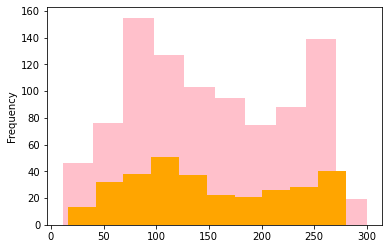

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(338630, 522860)

In [36]:
model_w2v.wv.most_similar(positive = "biden")

[('presidentialdebate', 0.6982961893081665),
 ('turned', 0.6966702938079834),
 ('individual', 0.6940471529960632),
 ('animal', 0.6939530968666077),
 ('favorite', 0.6895966529846191),
 ('fired', 0.689272403717041),
 ('information', 0.6877340078353882),
 ('dc', 0.6871744990348816),
 ('completely', 0.6860233545303345),
 ('pardon', 0.6845703125)]

In [37]:
model_w2v.wv.most_similar(negative = "biden")

[('china', -0.3987290859222412),
 ('social', -0.41482412815093994),
 ('fake', -0.41648420691490173),
 ('making', -0.41924911737442017),
 ('new', -0.420029878616333),
 ('story', -0.4208733141422272),
 ('deals', -0.42526841163635254),
 ('money', -0.42833513021469116),
 ('millions', -0.43211472034454346),
 ('or', -0.4337758421897888)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(923, 500)
(923,)
(308, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989165763813651
Validation Accuracy : 0.5746753246753247
F1 score : 0.5371024734982331
[[101  25]
 [106  76]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9956663055254604
Validation Accuracy : 0.5487012987012987
f1 score : 0.5775075987841947
[[74 52]
 [87 95]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989165763813651
Validation Accuracy : 0.5227272727272727
f1 score : 0.5180327868852459
[[ 82  44]
 [103  79]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9512459371614301
Validation Accuracy : 0.5714285714285714
f1 score : 0.7142857142857143
[[ 11 115]
 [ 17 165]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 joe biden should invite the saudis who rented rooms at trump hotels and never stayed there and the ceo of the chinese bank where trump has his secret bank account to tonight s debate 

First sample after preprocessing: 
 [ 16   1  68   2  49  46  14   5 116  69   5   2   8   2 133 147 212  14
  38  23 180 147 137   3  92   7  51   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6909 - accuracy: 0.5301 - val_loss: 0.6839 - val_accuracy: 0.5699
Epoch 2/20
7/7 - 1s - loss: 0.6827 - accuracy: 0.5723 - val_loss: 0.6830 - val_accuracy: 0.5699
Epoch 3/20
7/7 - 1s - loss: 0.6811 - accuracy: 0.5723 - val_loss: 0.6819 - val_accuracy: 0.5699
Epoch 4/20
7/7 - 1s - loss: 0.6785 - accuracy: 0.5723 - val_loss: 0.6812 - val_accuracy: 0.5699
Epoch 5/20
7/7 - 1s - loss: 0.6730 - accuracy: 0.5723 - val_loss: 0.6773 - val_accuracy: 0.5699
Epoch 6/20
7/7 - 1s - loss: 0.6638 - accuracy: 0.5723 - val_loss: 0.6710 - val_accuracy: 0.5699
Epoch 7/20
7/7 - 1s - loss: 0.6454 - accuracy: 0.5819 - val_loss: 0.6578 - val_accuracy: 0.5914
Epoch 8/20
7/7 - 1s - loss: 0.6088 - accuracy: 0.6506 - val_loss: 0.6326 - val_accuracy: 0.6344
Epoch 9/20
7/7 - 1s - loss: 0.5417 - accuracy: 0.7699 - val_loss: 0.5999 - val_accuracy: 0.6667
Epoch 10/20
7/7 - 1s - loss: 0.4521 - accuracy: 0.8410 - val_loss: 0.5610 - val_accuracy: 0.7312
Epoch 11/20
7/7 - 1s - loss: 0.3511 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,frank luntz isn t sure what the bombshell is i...
1,0,i am also hoping for at least one more shut up...
2,1,bombshell biden insider claims he was recipien...
3,1,sure spend more time tweeting about hunter bid...
4,0,so verified e mails that were just corroborate...
...,...,...
1995,0,the biden s are dirty we only know a very very...
1996,-1,trump invites hunter biden ex associate tony b...
1997,-1,i heard biden just invited giuliani and borat ...
1998,-1,it s going to be another shit show tonight i h...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9986666666666667
Validation Accuracy : 0.456
F1 score : [0.54005935 0.36170213 0.45144357]
[[91 37 61]
 [26 51 49]
 [31 68 86]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9006666666666666
Validation Accuracy : 0.42
f1 score : [0.49591281 0.2690583  0.43414634]
[[91 30 68]
 [28 30 68]
 [59 37 89]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9986666666666667
Validation Accuracy : 0.396
f1 score : [0.44655582 0.26666667 0.41192412]
[[94 28 67]
 [57 28 41]
 [81 28 76]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.864
Validation Accuracy : 0.48
f1 score : [0.55096419 0.10958904 0.53767821]
[[100   7  82]
 [ 26   8  92]
 [ 48   5 132]]


In [59]:
X_Train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['pete buttigieg and a huge number of other unemployed dem s will say anything good about old joe biden just to get a cushy job truth is not required', 'you are on fire thank you so much biden', 'hunter biden es argentino thief', 'biden should step down trump', 'obama clinton biden and kerry with susan powers extorted every country they wiere involved in candida france germany vouches for obama admid and davos leftist elite thier gamers on thier dumb pc brains we are lost lives dingy dony gong', 'media is constantly reporting how corrupt politicians are trump biden hilary etc election year shows up we pick from the very list of people the media said was scamming us for wealth then blame the media hahahahaha you mfers cant read actually this is america', 'biden has release y of his tax returns and there is no income coming from china where are trump s tax returns where does the m he cashed in from his chinese account the day after inauguration come f

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.3810 - accuracy: 0.2696 - val_loss: 0.1843 - val_accuracy: 0.2533
Epoch 2/20
11/11 - 2s - loss: -1.7841e-01 - accuracy: 0.2644 - val_loss: 0.0826 - val_accuracy: 0.2533
Epoch 3/20
11/11 - 2s - loss: -4.7867e-01 - accuracy: 0.2644 - val_loss: 0.1623 - val_accuracy: 0.2533
Epoch 4/20
11/11 - 3s - loss: -8.6030e-01 - accuracy: 0.2644 - val_loss: 0.2683 - val_accuracy: 0.2533
Epoch 5/20
11/11 - 2s - loss: -1.5414e+00 - accuracy: 0.2644 - val_loss: 0.4359 - val_accuracy: 0.2533
Epoch 6/20
11/11 - 2s - loss: -2.5216e+00 - accuracy: 0.2644 - val_loss: 0.8035 - val_accuracy: 0.2533
Epoch 7/20
11/11 - 2s - loss: -5.2976e+00 - accuracy: 0.2644 - val_loss: 1.1795 - val_accuracy: 0.2533
Epoch 8/20
11/11 - 2s - loss: -8.9144e+00 - accuracy: 0.2644 - val_loss: 1.4139 - val_accuracy: 0.2533
Epoch 9/20
11/11 - 2s - loss: -1.5906e+01 - accuracy: 0.2644 - val_loss: 1.1031 - val_accuracy: 0.2533
Epoch 10/20
11/11 - 2s - loss: -2.5615e+01 - accuracy: 0.2644 - val_loss: -5.3